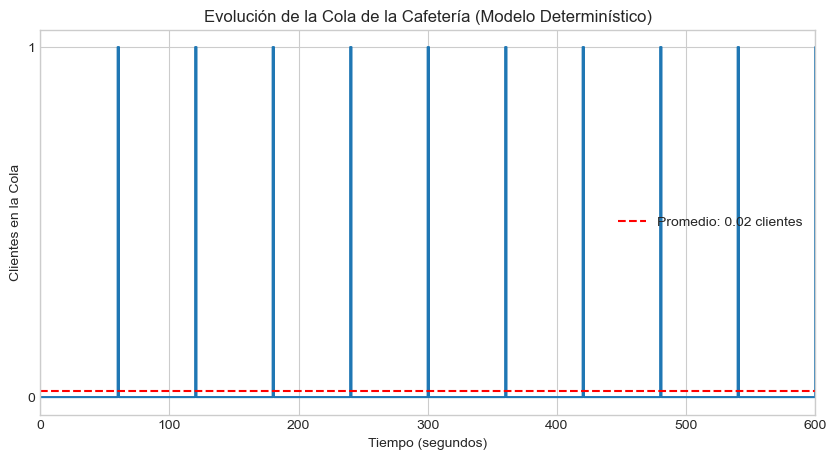

Simulación completada.
Tamaño máximo de la cola: 1 clientes.


In [22]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Parámetros del modelo
# SEGUNDOS_LLEGADA: Tiempo entre llegadas de clientes (λ = 1/60 clientes por segundo)
# SEGUNDOS_SERVICIO: Tiempo que tarda el barista en atender a un cliente (μ = 1/45 servicios por segundo)
# TIEMPO_SIMULACION: Duración total de la simulación (1 hora = 3600 segundos)
SEGUNDOS_LLEGADA = 60
SEGUNDOS_SERVICIO = 45
TIEMPO_SIMULACION = 3600  # 1 hora

# 2. Variables de estado del sistema
# clientes_en_cola: Número actual de clientes esperando ser atendidos
# tiempo_para_llegada: Contador regresivo para la próxima llegada
# tiempo_servicio_restante: Tiempo restante del servicio actual
# historial_cola: Lista para registrar el tamaño de la cola en cada segundo
clientes_en_cola = 0
tiempo_para_llegada = SEGUNDOS_LLEGADA
tiempo_servicio_restante = 0
historial_cola = []

# 3. Ciclo principal de simulación
for segundo_actual in range(TIEMPO_SIMULACION):
    # Actualizar el tiempo de servicio del barista
    # Si está atendiendo a alguien (tiempo_servicio_restante > 0), reducir el contador
    if tiempo_servicio_restante > 0:
        tiempo_servicio_restante -= 1

    # PASO 1: Proceso de llegada de clientes
    # Modelo determinístico: los clientes llegan exactamente cada SEGUNDOS_LLEGADA
    if segundo_actual >= tiempo_para_llegada:
        clientes_en_cola += 1  # Un nuevo cliente se une a la cola
        tiempo_para_llegada += SEGUNDOS_LLEGADA  # Programar la siguiente llegada

    # PASO 2: Registrar el estado actual del sistema
    # Guardamos el número de clientes en cola en este instante
    historial_cola.append(clientes_en_cola)

    # PASO 3: Proceso de servicio
    # Si el barista está libre (tiempo_servicio_restante <= 0) y hay clientes esperando
    if tiempo_servicio_restante <= 0 and clientes_en_cola > 0:
        clientes_en_cola -= 1  # Un cliente comienza a ser atendido
        tiempo_servicio_restante = SEGUNDOS_SERVICIO  # Iniciar nuevo servicio

# Visualización de resultados
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 5))

# Usar plt.step para mostrar cambios discretos en el tamaño de la cola
ax.step(range(TIEMPO_SIMULACION), historial_cola, where='post')

# Configuración del gráfico
ax.set_title("Evolución de la Cola de la Cafetería (Modelo Determinístico)")
ax.set_xlabel("Tiempo (segundos)")
ax.set_ylabel("Clientes en la Cola")
ax.set_yticks([0, 1])  # Solo mostramos 0 y 1 en el eje Y por claridad
ax.axhline(y=np.mean(historial_cola), color='r', linestyle='--',
           label=f"Promedio: {np.mean(historial_cola):.2f} clientes")
plt.legend()
plt.xlim(0, 600)  # Mostrar solo los primeros 10 minutos para mejor visibilidad
plt.show()

# Imprimir estadísticas finales
print(f"Simulación completada.")
print(f"Tamaño máximo de la cola: {max(historial_cola)} clientes.")

Simulación más realista

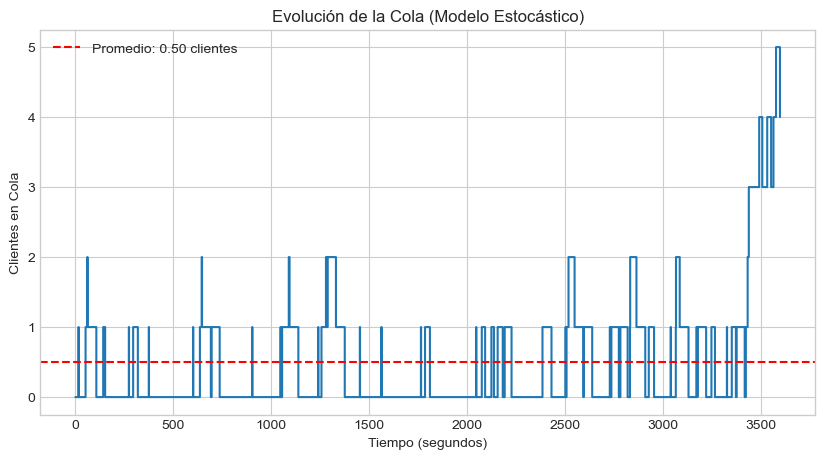

Simulación estocástica completada.
Tamaño máximo de la cola: 5 clientes
Tamaño promedio de la cola: 0.50 clientes


In [23]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Parámetros del modelo
# La probabilidad mantiene el mismo promedio de 1 cliente cada 60s
PROBABILIDAD_LLEGADA = 1.0 / 60.0  # λ = 1/60 clientes por segundo en promedio
SEGUNDOS_SERVICIO = 45     # μ = 1/45 servicios por segundo
TIEMPO_SIMULACION = 3600  # 1 hora en segundos

# 2. Variables de estado del sistema
# clientes_en_cola: Número actual de clientes esperando
# tiempo_servicio_restante: Tiempo hasta que termine el servicio actual
# historial_cola: Lista para registrar el tamaño de la cola en cada segundo
clientes_en_cola = 0
tiempo_servicio_restante = 0
historial_cola = []

# 3. Ciclo principal de simulación con lógica estocástica
for segundo_actual in range(TIEMPO_SIMULACION):
    # Actualizar el tiempo de servicio del barista
    if tiempo_servicio_restante > 0:
        tiempo_servicio_restante -= 1

    # PASO 1: Proceso de llegada de clientes
    # Generar número aleatorio entre 0 y 1. Si es menor que nuestra
    # probabilidad definida, consideramos que un cliente ha llegado (proceso de Poisson)
    if np.random.rand() < PROBABILIDAD_LLEGADA:
        clientes_en_cola += 1

    # PASO 2: Registrar el estado actual del sistema
    # Guardamos el número de clientes en cola en este instante
    historial_cola.append(clientes_en_cola)

    # PASO 3: Proceso de servicio
    # Si el barista está libre (tiempo_servicio_restante <= 0) y hay clientes esperando
    if tiempo_servicio_restante <= 0 and clientes_en_cola > 0:
        clientes_en_cola -= 1  # Un cliente comienza a ser atendido
        tiempo_servicio_restante = SEGUNDOS_SERVICIO  # Iniciar nuevo servicio

# --- Visualización de Resultados ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 5))
ax.step(range(TIEMPO_SIMULACION), historial_cola, where='post')
ax.set_title("Evolución de la Cola (Modelo Estocástico)")
ax.set_xlabel("Tiempo (segundos)")
ax.set_ylabel("Clientes en Cola")
ax.axhline(y=np.mean(historial_cola), color='r', linestyle='--',
           label=f"Promedio: {np.mean(historial_cola):.2f} clientes")
plt.legend()
plt.show()

# Imprimir estadísticas finales
print(f"Simulación estocástica completada.")
print(f"Tamaño máximo de la cola: {max(historial_cola)} clientes")
print(f"Tamaño promedio de la cola: {np.mean(historial_cola):.2f} clientes")

In [24]:
def simular_cola(segundos_servicio, duracion_sim=3600):
    """
    Ejecuta una simulación de la cola de la cafetería para una duración
    y tiempo de servicio específicos.
    
    Parámetros:
    -----------
    segundos_servicio : int
        Tiempo que tarda el barista en atender a un cliente
    duracion_sim : int
        Duración total de la simulación en segundos (default: 1 hora)
    
    Retorna:
    --------
    tuple : (cola_maxima, cola_promedio)
        Tamaño máximo y promedio de la cola durante la simulación
    """
    # Parámetros del modelo
    probabilidad_llegada = 1.0 / 60.0  # λ = 1/60 clientes/segundo

    # Variables de estado
    clientes_en_cola = 0
    tiempo_servicio_restante = 0
    historial_cola = []

    # Ciclo principal de simulación
    for _ in range(duracion_sim):
        # Actualizar tiempo de servicio
        if tiempo_servicio_restante > 0:
            tiempo_servicio_restante -= 1

        # Proceso de llegada (Poisson)
        if np.random.rand() < probabilidad_llegada:
            clientes_en_cola += 1

        # Registrar estado
        historial_cola.append(clientes_en_cola)

        # Proceso de servicio
        if tiempo_servicio_restante <= 0 and clientes_en_cola > 0:
            clientes_en_cola -= 1
            tiempo_servicio_restante = segundos_servicio

    # Calcular estadísticas
    cola_maxima = max(historial_cola) if historial_cola else 0
    cola_promedio = np.mean(historial_cola) if historial_cola else 0

    return (cola_maxima, cola_promedio)


# --- Parámetros del Análisis de Monte Carlo ---
N_SIMULACIONES = 500
TIEMPO_SERVICIO_ACTUAL = 45  # Máquina actual
TIEMPO_SERVICIO_NUEVO = 30   # Máquina nueva

# Ejecutar simulaciones para escenario actual
resultados_actual = []
for _ in range(N_SIMULACIONES):
    resultados_actual.append(simular_cola(TIEMPO_SERVICIO_ACTUAL))

# Ejecutar simulaciones para escenario nuevo
resultados_nuevo = []
for _ in range(N_SIMULACIONES):
    resultados_nuevo.append(simular_cola(TIEMPO_SERVICIO_NUEVO))

# --- Análisis de Resultados ---
df_actual = pd.DataFrame(resultados_actual, columns=[
                         'Cola Máxima', 'Cola Promedio'])
df_nuevo = pd.DataFrame(resultados_nuevo, columns=[
                        'Cola Máxima', 'Cola Promedio'])

# Imprimir resumen comparativo
print("--- Análisis Comparativo de Simulación (N={}) ---".format(N_SIMULACIONES))
print("\n                  | Máquina Actual (45s) | Máquina Nueva (30s)")
print("------------------|----------------------|--------------------")
print("Cola Máxima Prom. |         {:<14.2f} |       {:<14.2f}".format(
    df_actual['Cola Máxima'].mean(), df_nuevo['Cola Máxima'].mean()))
print("Cola Media Prom.  |         {:<14.2f} |       {:<14.2f}".format(
    df_actual['Cola Promedio'].mean(), df_nuevo['Cola Promedio'].mean()))
print("\n--- Conclusión ---")
print(
    f"La nueva máquina reduce la cola máxima esperada en un {100 * (1 - df_nuevo['Cola Máxima'].mean() / df_actual['Cola Máxima'].mean()):.1f}%")

--- Análisis Comparativo de Simulación (N=500) ---

                  | Máquina Actual (45s) | Máquina Nueva (30s)
------------------|----------------------|--------------------
Cola Máxima Prom. |         5.00           |       3.00          
Cola Media Prom.  |         0.99           |       0.25          

--- Conclusión ---
La nueva máquina reduce la cola máxima esperada en un 40.0%
